# Assignment 3: Linear Regression

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt`, `dataQuadReg2D_noisy.txt` and `airfoil_self_noise.dat` are in the same directory as the notebook.

List your team members (name and immatriculation number) and indicate whether you are a B.Sc. Data Science or other group in the following cell:

- *Your names here*

## Task 1: Ridge Regression for Polynomial 2D Functions

Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [161]:
# Load required packages and datasets. Do not modify.
import numpy as np


def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`). You may also experiment with other feature transformations, e.g. third-order polynomials.

In [162]:
def make_features(X, ftype='lin'):
    n, d = X.shape
    
    if ftype == 'lin': # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'quad':  # Quadratic feature transformation
                    
        Phi = np.empty((n, 1+d +(d*(d+1))/2))
        Phi[:, 0] = 1
        Phi[:, 1:d+1] = X
        index = d+1
        for i in range(0,d):
            for j in range(i,d):
                Phi[:, index + (j-i)] = X[:, i] * X[:, j]
            index += d-i    

        
    
    elif ftype == 'nasa':
        # Implement for task 2.2.
        pass
    
    else:
        raise Exception('Feature type {} not implemented yet'.format(ftype))
    
    return Phi

2) Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`.

In [163]:
# Implement your solution here.
class RidgeRegression(object):
    def __init__(self, lambda_, ftype = 'lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.        y is an array of shape (n,)
        """

        Phi = make_features(X, self.ftype)
       

        C = Phi.T.dot(Phi) + self.lambda_ * np.eye(Phi.shape[1])
        self.beta = np.linalg.inv(C).dot(Phi.T.dot(y))
        
        
        
        
    
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)

        return Phi.dot(self.beta)
        
        
    

3) Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [164]:
def MSE(y_pred, y_true):
    # Implement your solution here.
    return (np.square(y_pred - y_true)).mean(axis=None)
    

4) Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Try to find a good `lambda_`. How does it perform with quadratic features on this data set? Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

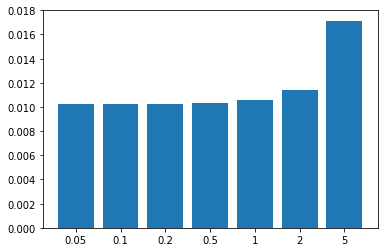

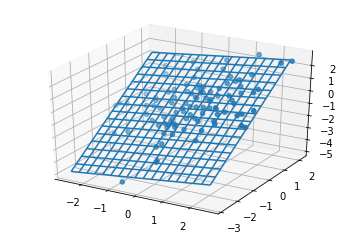

In [165]:
def train_evaluate(regression_model, X, y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)    
    #print('MSE:', MSE(yhat, y))
    return MSE(yhat,y)

    
def plot_data_and_model(regression_model, X, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    %matplotlib inline
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    xmin = X.min(0)
    xmax = X.max(0)

    x0grid, x1grid = np.mgrid[xmin[0]:xmax[0]:.3, xmin[1]:xmax[1]:.3]

    xdim0, xdim1 = np.shape(x0grid)
    xsize = np.size(x0grid)

    x0hat = x0grid.flatten()
    x1hat = x1grid.flatten()
    x0hat = x0hat.reshape((np.size(x0hat), 1))
    x1hat = x1hat.reshape((np.size(x1hat), 1))
    xhat = np.append(x0hat, x1hat, 1)
    xhatfv = make_features(xhat, regression_model.ftype)
    yhat = xhatfv.dot(regression_model.beta)
    ygrid = yhat.reshape((xdim0, xdim1))
    ax.plot_wireframe(x0grid, x1grid, ygrid)
    ax.auto_scale_xyz([xmin[0], xmax[0]], [xmin[1], xmax[1]], [y.min(), y.max()])
    fig.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline    
# Implement your solution here.
mse = []
for lmbda in [0.05, 0.1, 0.2, 0.5, 1, 2 , 5]:
    regression_lin = RidgeRegression(lmbda, ftype='lin')
    mse.append(train_evaluate(regression_lin, X_lin, y_lin))
    
    
fig = plt.figure()
lmbda = ["0.05", "0.1", "0.2", "0.5", "1", "2", "5"]
x_pos = [i for i, _ in enumerate(lmbda)]
plt.bar(x_pos, mse)
plt.xticks(x_pos, lmbda)
plt.show()

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_lin, X_lin, y_lin)

==> *Write your observations here and report your results.* (double klick here to edit)

5) Try to find a good model (including features and suitable `lambda_` parameters) for the quadratic data set `(X_quad, y_quad)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

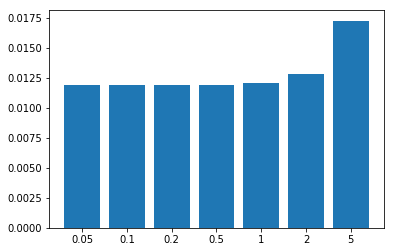

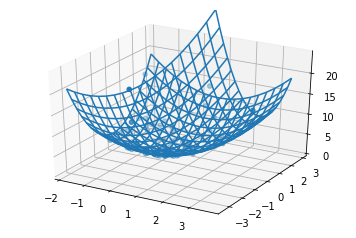

In [166]:
# Implement your model tests here using the quadratic data set
mse = []
for lmbda in [0.05, 0.1, 0.2, 0.5, 1, 2 , 5]:
    regression_quad = RidgeRegression(lmbda, ftype='quad')
    mse.append(train_evaluate(regression_quad, X_quad, y_quad))

fig = plt.figure()
lmbda = ["0.05", "0.1", "0.2", "0.5", "1", "2", "5"]
x_pos = [i for i, _ in enumerate(lmbda)]
plt.bar(x_pos, mse)
plt.xticks(x_pos, lmbda)
plt.show()

plot_data_and_model(regression_quad, X_quad, y_quad)

==> *Write your observations here and report your results.* (double klick here to edit)

6) Try to find a good model (including features and suitable `lambda_` parameters) for the noisy data set `(X_noise, y_noise)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

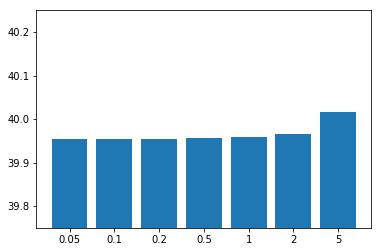

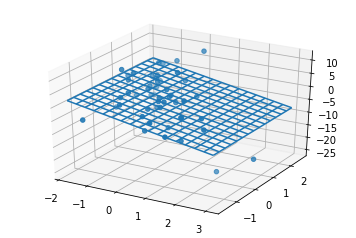

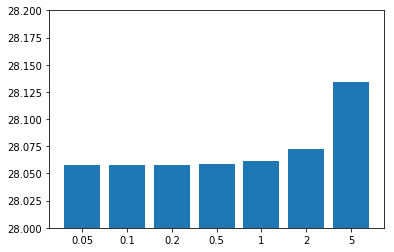

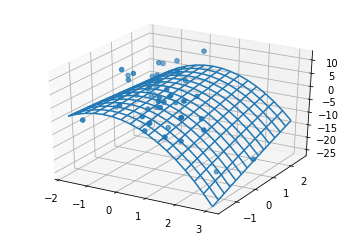

In [167]:
# Implement your model tests here using the noisy data set
mse = []
for lmbda in [0.05, 0.1, 0.2, 0.5, 1, 2 , 5]:
    regression_lin = RidgeRegression(lmbda, ftype='lin')
    mse.append(train_evaluate(regression_lin, X_noise, y_noise))

fig = plt.figure()
lmbda = ["0.05", "0.1", "0.2", "0.5", "1", "2", "5"]
x_pos = [i for i, _ in enumerate(lmbda)]
plt.bar(x_pos, mse)
plt.ylim(39.75,40.25)
plt.xticks(x_pos, lmbda)
plt.show()

plot_data_and_model(regression_lin, X_noise, y_noise)

mse = []
for lmbda in [0.05, 0.1, 0.2, 0.5, 1, 2 , 5]:
    regression_quad = RidgeRegression(lmbda, ftype='quad')
    mse.append(train_evaluate(regression_quad, X_noise, y_noise))

fig = plt.figure()
lmbda = ["0.05", "0.1", "0.2", "0.5", "1", "2", "5"]
x_pos = [i for i, _ in enumerate(lmbda)]
plt.bar(x_pos, mse)
plt.ylim(28,28.2)
plt.xticks(x_pos, lmbda)
plt.show()

plot_data_and_model(regression_quad, X_noise, y_noise)

==> *Write your observations here and report your results.* (double klick here to edit)

## Task 2: Airfoil Self-Noise Prediction

The air self-noise dataset is a [dataset by NASA](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Your task is to find a good feature mapping for ridge regression to achieve the lowest possible prediction error.

1) Explain the content of the dataset in few words. What are the input features? What is the output?

==> *Write your response here* (double klick here to edit)

In [168]:
def load_dataset(path):
    data = np.genfromtxt(path)
    X, y = data[:, :5], data[:, 5]
    
    return X, y
    

X, y = load_dataset('airfoil_self_noise.dat')

IOError: airfoil_self_noise.dat not found.

2) Implement the option `ftype = 'nasa'` in the `make_features` function. You should try any type of non-linear features and interactions between features. You are not restricted to the feature mapping presented in the lecture. It is helpful to think about the domain and characteristics of the features, e.g. how do you work with periodic features.

Explain the choice of your features:

==> *Briefly explain your chosen features.* (double klick here to edit)

3) Evaluate your Ridge Regression model with your chosen features on the data set. Try to find a good `lambda_`. Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [169]:
def train_evaluate(regression_model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    
    regression_model.fit(X_train, y_train)
    yhat_test = regression_model.predict(X_test)
    print('MSE:', MSE(yhat_test, y_test))

your_regression = RidgeRegression(lambda_=0.1, ftype='nasa')
train_evaluate(your_regression, X, y)

NameError: name 'X' is not defined

==> *Write your observations here and report your results.* (double klick here to edit)

**For all students other than B.Sc. Data Science:**

4) Implement the function `cross_validation` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [170]:
def cross_validation(regression_model, X, y):
    pass

your_regression = RidgeRegression(lambda_=0.1, , ftype='nasa')
cross_validation(your_regression, X, y)

SyntaxError: invalid syntax (<ipython-input-170-efce483617d3>, line 4)

==> *Write your observations here and report your results.* (double klick here to edit)